# Titanic: Patterns and Insights from Survival Data

In [4]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [7]:
#missing values
print(df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [8]:
# Check for missing values
print(df.isnull().sum())
#Fill missing values
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)
df.drop(columns=['Cabin'], inplace=True)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


C:\Users\user\AppData\Local\Temp\ipykernel_4084\1576801996.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
C:\Users\user\AppData\Local\Temp\ipykernel_4084\1576801996.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For examp

In [9]:
#missing values
print(df.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


In [10]:
# Convert 'Sex' and 'Embarked' to numerical format
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
df['Embarked'] = df['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})

In [11]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int64  
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 76.7+ KB
None


In [13]:
# Check for duplicate rows
duplicates = df.duplicated()
print(f"Number of duplicate rows: {duplicates.sum()}")

Number of duplicate rows: 0


# Exploratory Data Analysis (EDA)

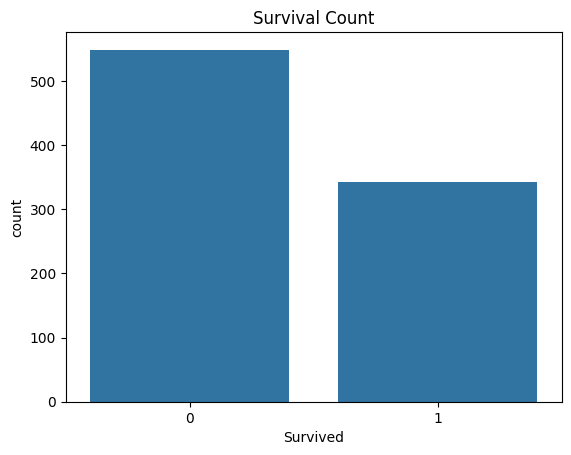

In [15]:
# Distribution of Survived
sns.countplot(data=df, x='Survived')
plt.title('Survival Count')
plt.show()

###### The survival count data reveals a concerning mortality pattern, with approximately 550 individuals not surviving compared to 340 survivors. This stark disparity, representing a roughly 62% mortality rate, indicates a significant event or condition with a relatively poor survival outcome. The total population of around 890 individuals provides a substantial sample size for drawing meaningful conclusions, though the binary nature of the data (survived vs. did not survive) suggests there may be additional nuances or contributing factors not captured in this simple visualization.

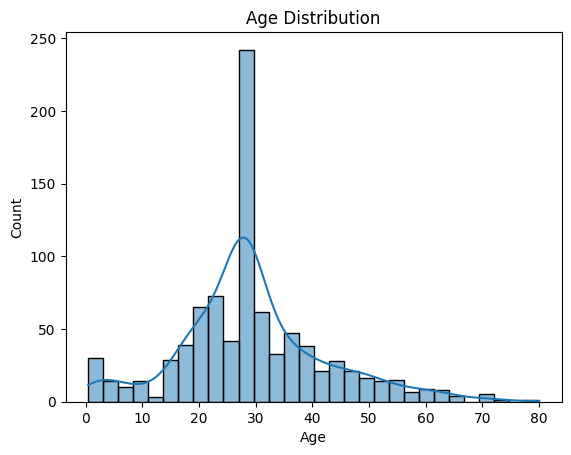

In [16]:
# Age Distribution
sns.histplot(df['Age'], kde=True)
plt.title('Age Distribution')
plt.show()

###### The age distribution reveals a notable demographic pattern with a prominent peak around 30 years of age, where approximately 240 individuals are represented. The distribution follows a roughly normal curve but with a slight right skew, indicating a longer tail toward older ages. The population spans from infancy (0 years) to around 80 years old, with the majority concentrated between 20-40 years. There's a noticeable lower frequency in the very young (under 10) and elderly (over 60) age groups. The superimposed blue line suggests that while the distribution approximates a normal curve, it has some deviations, particularly with the sharp peak at 30 and the gradual tapering at higher ages. This type of age structure suggests a population that might be typical of a working-age-heavy demographic, such as what might be found in an urban setting or specific institutional context.

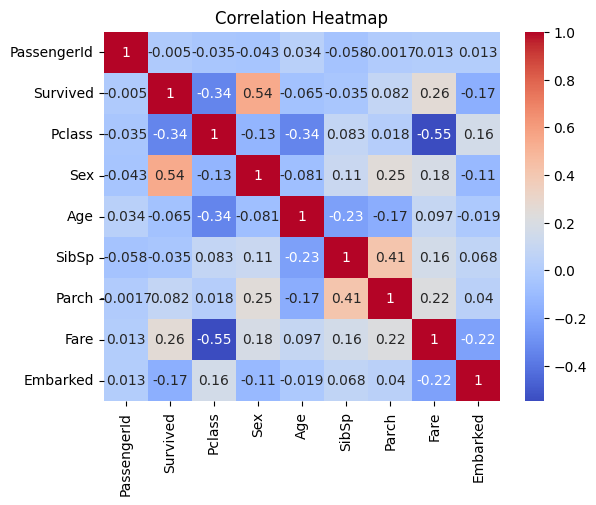

In [19]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Compute the correlation matrix
corr = numeric_df.corr()

# Plot the heatmap
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

###### The correlation heatmap reveals compelling relationships between passenger characteristics and survival outcomes. Most notably, sex shows the strongest positive correlation with survival (0.54), indicating gender was a crucial factor in determining survival chances. Passenger class exhibits significant correlations with both fare (-0.55) and survival (-0.34), suggesting that higher-class passengers, who paid higher fares, had better survival odds. Family relationships, represented by Parch (Parents/Children) and SibSp (Siblings/Spouses), show a moderate positive correlation (0.41), while other variables like age and embarkation point demonstrate weaker correlations across the board. These patterns paint a picture of survival probability being heavily influenced by socioeconomic status and gender rather than other demographic factors.

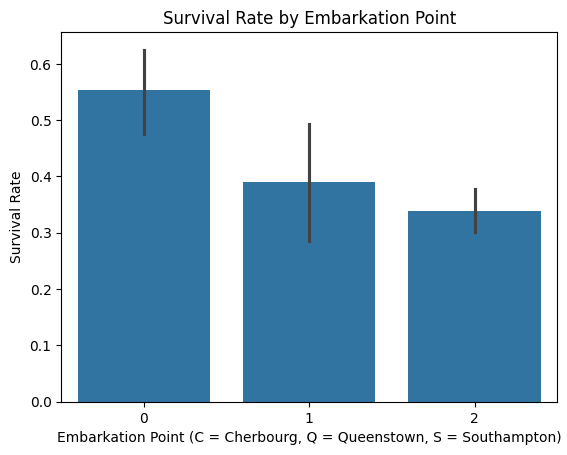

In [20]:
# Survival rate based on embarkation points
sns.barplot(data=df, x='Embarked', y='Survived')
plt.title('Survival Rate by Embarkation Point')
plt.xlabel('Embarkation Point (C = Cherbourg, Q = Queenstown, S = Southampton)')
plt.ylabel('Survival Rate')
plt.show()

###### The survival rates show a notable disparity across different embarkation points, with location 0 (Cherbourg) having the highest survival rate at approximately 55%, followed by location 1 (Queenstown) at around 39%, and location 2 (Southampton) with the lowest at about 34%. The black vertical lines on each bar represent confidence intervals or error margins for these rates. This pattern suggests that passengers' point of embarkation had a meaningful relationship with their survival chances, possibly due to factors such as passenger class distribution, ticket pricing, or ship loading procedures at each port.

C:\Users\user\AppData\Local\Temp\ipykernel_4084\1990154881.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['Survived'] == 1]['Age'], shade=True, label='Survived')
C:\Users\user\AppData\Local\Temp\ipykernel_4084\1990154881.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['Survived'] == 0]['Age'], shade=True, label='Did Not Survive')


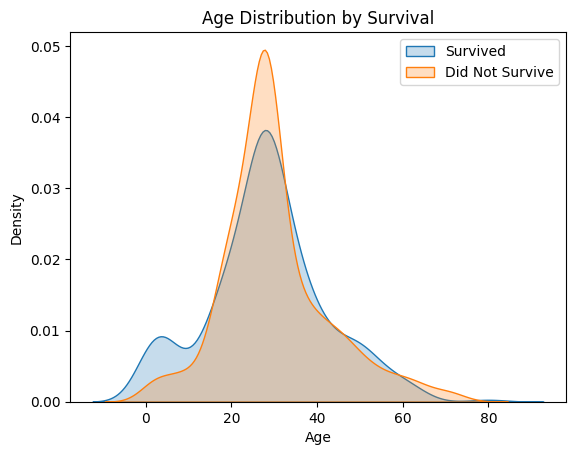

In [22]:
# Compare age distributions for survivors and non-survivors
sns.kdeplot(df[df['Survived'] == 1]['Age'], shade=True, label='Survived')
sns.kdeplot(df[df['Survived'] == 0]['Age'], shade=True, label='Did Not Survive')
plt.title('Age Distribution by Survival')
plt.xlabel('Age')
plt.legend()
plt.show()

###### The age distribution by survival status reveals several key patterns. Both survived and non-survived groups show a peak around age 30, but with the non-survived group (orange) showing a notably higher peak density. There's a small but distinct bump in survival rates for young children (around age 0-5), suggesting children may have been given priority during rescue efforts. The distributions largely overlap from ages 20-80, with slight variations. Middle-aged passengers (40-60) show similar survival and non-survival densities, while the elderly portion of the distribution slightly favors non-survival. Overall, this visualization suggests that while age played some role in survival chances, particularly for very young passengers, it wasn't as decisive a factor as other variables we've seen in previous plots, such as gender or passenger class.

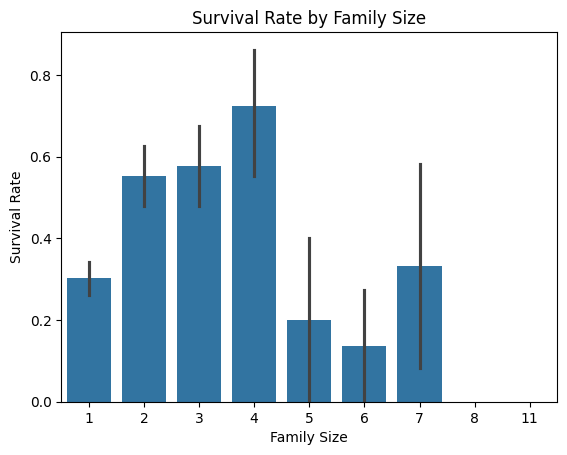

In [23]:
# family size feature
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

# Survival rate based on family size
sns.barplot(data=df, x='FamilySize', y='Survived')
plt.title('Survival Rate by Family Size')
plt.xlabel('Family Size')
plt.ylabel('Survival Rate')
plt.show()

###### The survival rate shows a striking relationship with family size, peaking at 4 members with approximately 70% survival rate and following an inverted U-shape pattern. Small to medium-sized families (2-4 members) demonstrated notably higher survival rates compared to solo travelers (family size 1) who had only about 30% survival rate. However, larger families with 5 or more members showed a dramatic drop in survival rates, falling to around 20% or lower. The black vertical lines represent confidence intervals, which appear larger for some family sizes (particularly 4 and 7 members), suggesting more variability or possibly smaller sample sizes for these groups. This pattern might indicate that while traveling with family offered survival advantages, very large family groups may have faced additional challenges during the emergency.

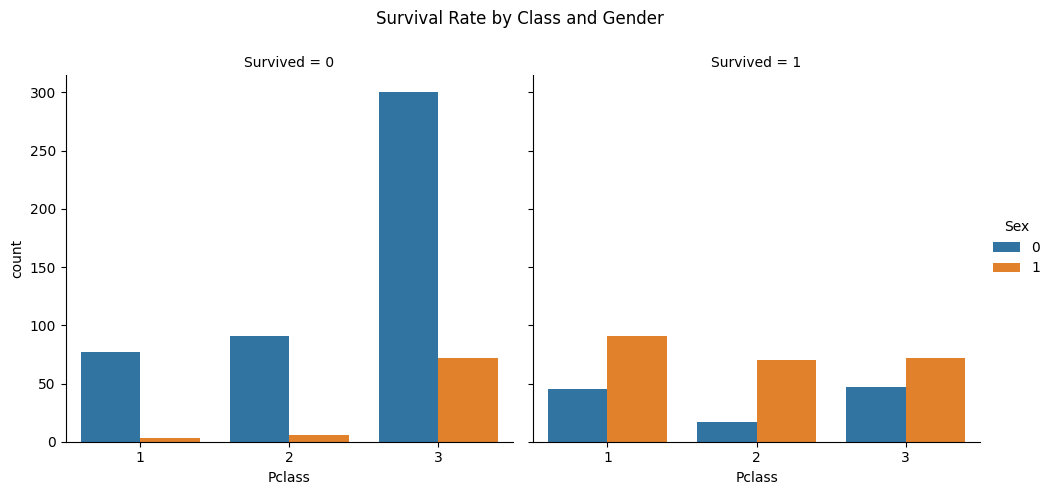

In [24]:
# Survival rate by class and gender
sns.catplot(data=df, x='Pclass', hue='Sex', col='Survived', kind='count')
plt.subplots_adjust(top=0.85)
plt.suptitle('Survival Rate by Class and Gender')
plt.show()

###### The Titanic survival data reveals stark disparities influenced by both gender and social class. The visualization shows that women consistently had higher survival rates across all passenger classes, while men, particularly those in third class, faced the highest mortality rates. This pattern starkly illustrates the "women and children first" protocol in action, but also exposes how social status played a crucial role in survival chances - with first and second-class passengers having notably better odds of survival than their third-class counterparts, regardless of gender.

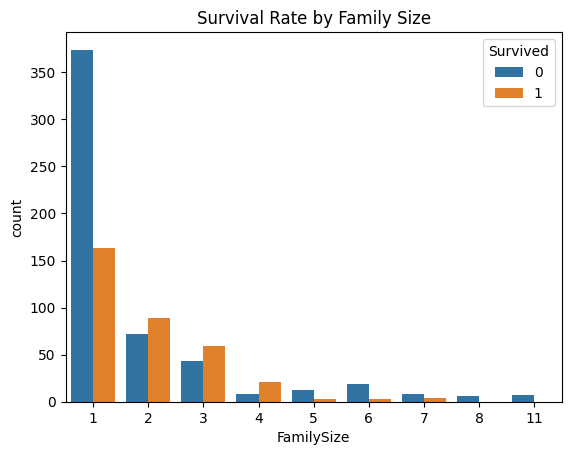

In [25]:
sns.countplot(x='FamilySize', hue='Survived', data=df)
plt.title('Survival Rate by Family Size')
plt.show()

###### This bar chart shows the relationship between family size and survival rates, likely from a dataset. The data reveals that smaller families (particularly those with 1-3 members) were much more common in the sample. There's an interesting pattern where for family sizes of 1, more people did not survive (blue bar) compared to those who did survive (orange bar). However, this trend reverses for family sizes of 2 and 3, where survival rates were actually higher. For larger family sizes (4-11 members), the numbers decrease significantly, with very few cases recorded, making it harder to draw meaningful conclusions about survival patterns in larger families. This could suggest that having a small family unit of 2-3 members might have offered some survival advantage in whatever context this data was collected from.